<a href="https://colab.research.google.com/github/Arbiter-glitch/MachineLearningProject/blob/master/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**

---
# Problem Statement:-
The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants  to build a model that will help to identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.
### THE GOAL IS...


*   To sell more personal loan products to bank customers.
*   To devise campaigns to better target marketing to increase the success ratio with minimal budget.
*  To identify the potential customers who have higher probability of purchasing the loan.

Increase the success ratio of advertisement campaign at the same time reduce the cost of the campaigns.

# Objective:-
The classification goal is to predict the likelihood of a liability customer buying personal loans.




##1. Importing Dataset and the Required Libraries.

---




The dataset contains data on 5000 customers

In [187]:
#Importing the necessary Libraries
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold

import os

In [133]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (2).csv


In [134]:
#The datset is read
import io
df = pd.read_csv(io.BytesIO(uploaded["Bank_Personal_Loan_Modelling.csv"]))

In [135]:
#To display the top 5 entries or rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [136]:
#To display the bottom 5 entries or rows
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


There are 14 features .The aim is to construct a model that can identify potential customers that have higher probability of purchasing a loan.Therefore the output column is **Personal Loan**.
### Feature definition:

- ID - Customer ID
- Age - Customer's age 
- Experience - Number of years of professional experience.
- Income - Annual income of the customer 
- ZIPCode - Home Address ZIP code.
- Family - Family size of the customer
- CCAvg - Avg. spending on credit cards per month 
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage - Value of house mortgage if any

- Securities Account - Does the customer have a securities account with the bank?
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

- Online - Does the customer use internet banking facilities?
- CreditCard - Does the customer uses a credit card issued by UniversalBank?
- Personal Loan - Did this customer accept the personal loan offered in the last campaign?



### Categorical Feature:


- Family
- Education
- ID
- Zip Code
- Securities Account
- CD Account
- Online
- Credit Card

### Numerical feature:
    
- Age
- Experience
- Income
- CCAvg
- Mortage


Personal Loan is the Output.

## 1.1 Checking the type of data and basic summary stats

In [137]:
#The shape of the Dataset
print("Shape of the dataset is:-",df.shape)

Shape of the dataset is:- (5000, 14)


In [138]:
#To display the datatype of each column and also display the non-null rows for each columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [139]:
#To display how many null values are present in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [140]:
#To display the Summary stats which include count,mean,std,min,max,etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###Inference
* Column "Experience" has negative values.

## 2. Dropping Irrelevant Columns

---


The columns which does not have any signal (significance) can be dropped.Hence we can drop the ID column.

Also faulty data  is present in the Experience column .

In [141]:
#Checking the correlation factor b/w Age and Experience
experience=df['Experience']
age=df['Age']
Correlation=experience.corr(age)
print('The correlation factor between Age and Experience is:-', Correlation)

The correlation factor between Age and Experience is:- 0.9942148569683321


###Inference:

* There is high correlation between age and experience.

Hence the Experience column can also be dropped.
 




In [142]:
df=df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


## 3.Exploratory Data Analysis(EDA)

---



In [144]:
#displaying the number of unique values in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Inference:


*  The Column Zipcode has 467 unique values hence it is a nominal variable.Therefore we can drop Zipcode from the dataset.




In [145]:
df.drop('ZIP Code',axis=1).head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [146]:
#Displaying the number of people with 0 mortages
(df.Mortgage==0).sum()

3462

Inference:

* There are 3462 people with zero mortages

In [147]:
#Displaying the number of people with 0 credit card spending per month
(df.CCAvg==0).sum()

106

Inference:

* There are 106 people with zero credit card spending per month

## 3.1 Value counts of Categorical variables

In [148]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [149]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [150]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [151]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [152]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [153]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

## 3.2.1 Univariate Analysis of Continuous Variables -1

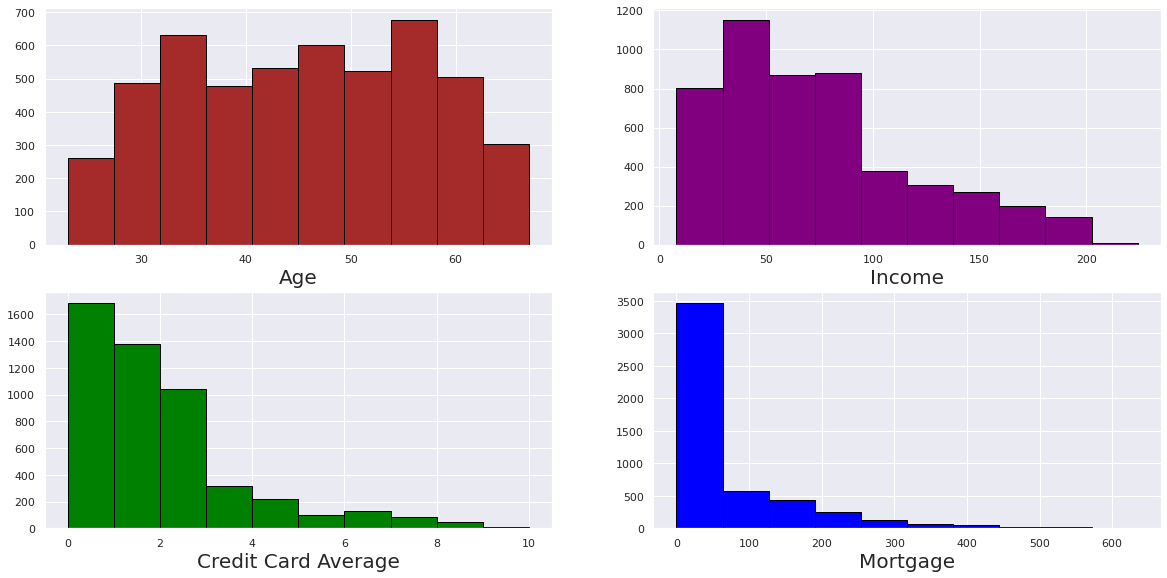

In [154]:
plt.figure(figsize= (20,20))
plt.subplot(4,2,1)
plt.hist(df.Age, color='brown', edgecolor = 'black')
plt.xlabel('Age',fontsize=20)

plt.subplot(4,2,2)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income',fontsize=20)

plt.subplot(4,2,3)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average',fontsize=20)

plt.subplot(4,2,4)
plt.hist(df.Mortgage, color='blue', edgecolor = 'black')
plt.xlabel('Mortgage',fontsize=20)

plt.show()

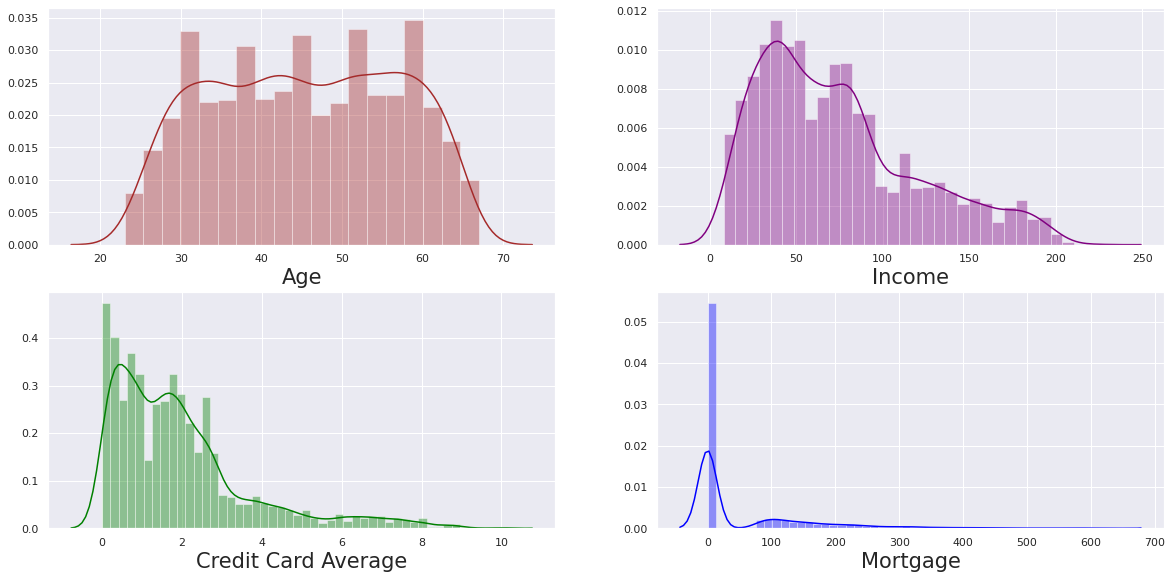

In [237]:
plt.figure(figsize= (20,20))
plt.subplot(4,2,1)
sns.distplot(df.Age, color='brown')
plt.xlabel('Age',fontsize=21)

plt.subplot(4,2,2)
sns.distplot(df.Income,color='purple')
plt.xlabel('Income',fontsize=21)

plt.subplot(4,2,3)
sns.distplot(df.CCAvg, color='green')
plt.xlabel('Credit Card Average',fontsize=21)

plt.subplot(4,2,4)
sns.distplot(df.Mortgage, color='blue')
plt.xlabel('Mortgage',fontsize=21)

plt.show()

###Observation
* Age seems to be normally distributed.
* Income,CCAvg and Mortgage seems to be highly skewed.


In [156]:
#Checking for Skewness of data
import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame(data={'Skewness' : [stats.skew(df.Age),stats.skew(df.Income),stats.skew(df.CCAvg)
                                      ,stats.skew(df.Mortgage)]},index=['Age','Income','CCAvg','Mortgage'])
Skewness

,Skewness
Age,-0.029332
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


### Inference
* Age appears to be symmetrically distributed
* Income,CCAvg and Mortgage are positively skewed hence may contain many extreme values.

##3.2.2 Univariate Analysis of Continuous Variables -2

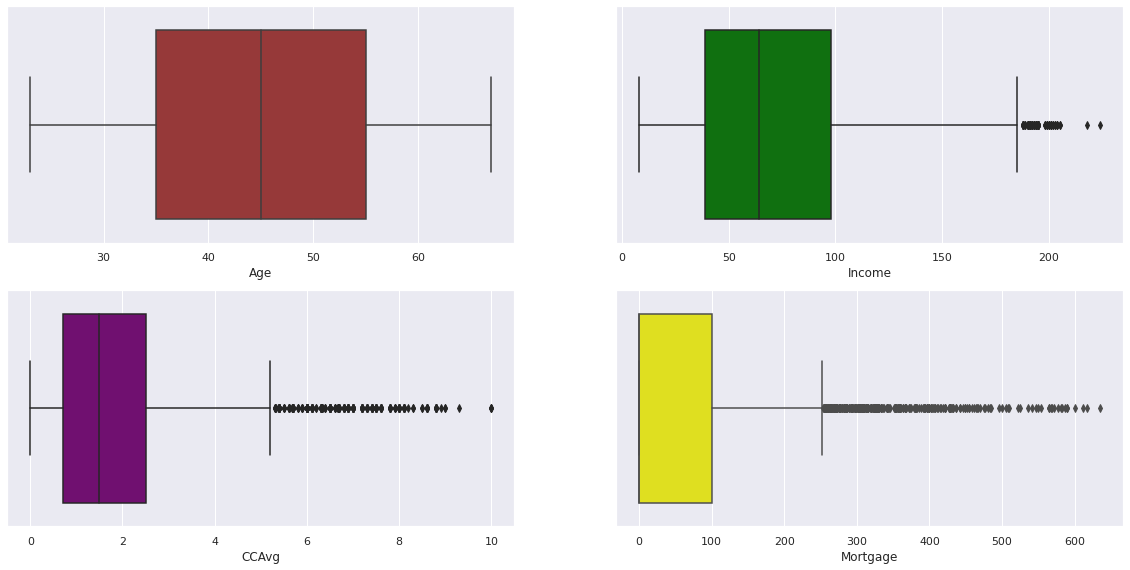

In [157]:
plt.figure(figsize= (20,20))
plt.subplot(4,2,1)
sns.boxplot(x= df.Age, color='brown')

plt.subplot(4,2,2)
sns.boxplot(x= df.Income, color='green')

plt.subplot(4,2,3)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(4,2,4)
sns.boxplot(x= df.Mortgage, color='yellow')

### Inference
  * Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can also infer from the boxplot above, that mean is almost equal to median.

*  Income is positively skewed. Majority of the customers have income between 40K and 55K.

* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority of customers spends less than 2.5K.

* Most of the individuals have a mortgage of less than 50K. However the max value of mortgage is 635K(from describe()).

## 3.2.3 Univariate Analysis of the Categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

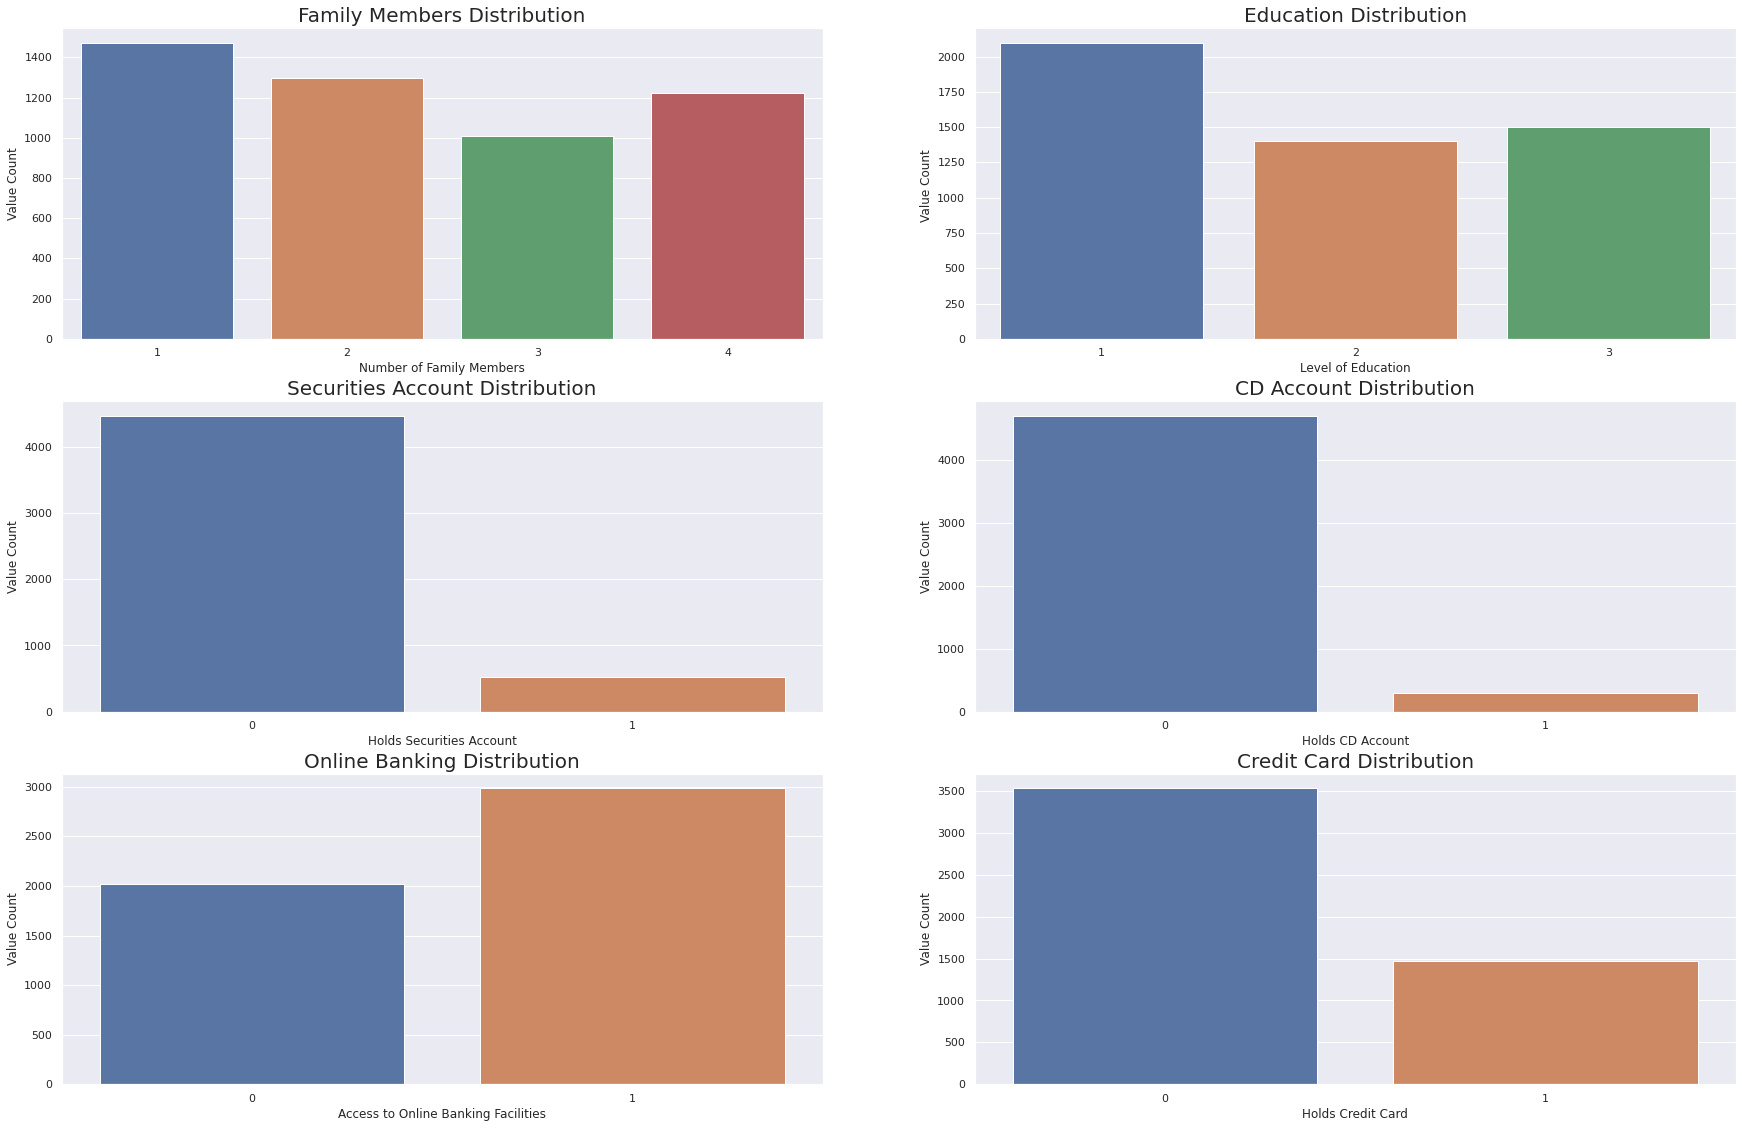

In [158]:
plt.figure(figsize=(30,40))


plt.subplot(6,2,1)
sns.countplot(df.Family)
plt.xlabel('Number of Family Members')
plt.ylabel('Value Count')
plt.title('Family Members Distribution',fontsize=20)


plt.subplot(6,2,2)
sns.countplot(df.Education)
plt.xlabel('Level of Education')
plt.ylabel('Value Count ')
plt.title('Education Distribution',fontsize=20)


plt.subplot(6,2,3)
sns.countplot(df['Securities Account'])
plt.xlabel('Holds Securities Account')
plt.ylabel('Value Count')
plt.title('Securities Account Distribution',fontsize=20)


plt.subplot(6,2,4)
sns.countplot(df['CD Account'])
plt.xlabel('Holds CD Account')
plt.ylabel('Value Count')
plt.title('CD Account Distribution',fontsize=20)


plt.subplot(6,2,5)
sns.countplot(df.Online)
plt.xlabel('Access to Online Banking Facilities')
plt.ylabel('Value Count')
plt.title('Online Banking Distribution',fontsize=20)


plt.subplot(6,2,6)
sns.countplot(df['CreditCard'])
plt.xlabel('Holds Credit Card')
plt.ylabel('Value Count')
plt.title('Credit Card Distribution',fontsize=20)

###Observations
* Family and Education are ordinal variables since they are evenly distributed.
* It seems that not many of the population holds Securities account or CD Account.
* A greater part of the population has access to online banking.
* Atmost 1500 holds a credit card.

##3.3 Bivariate Analysis

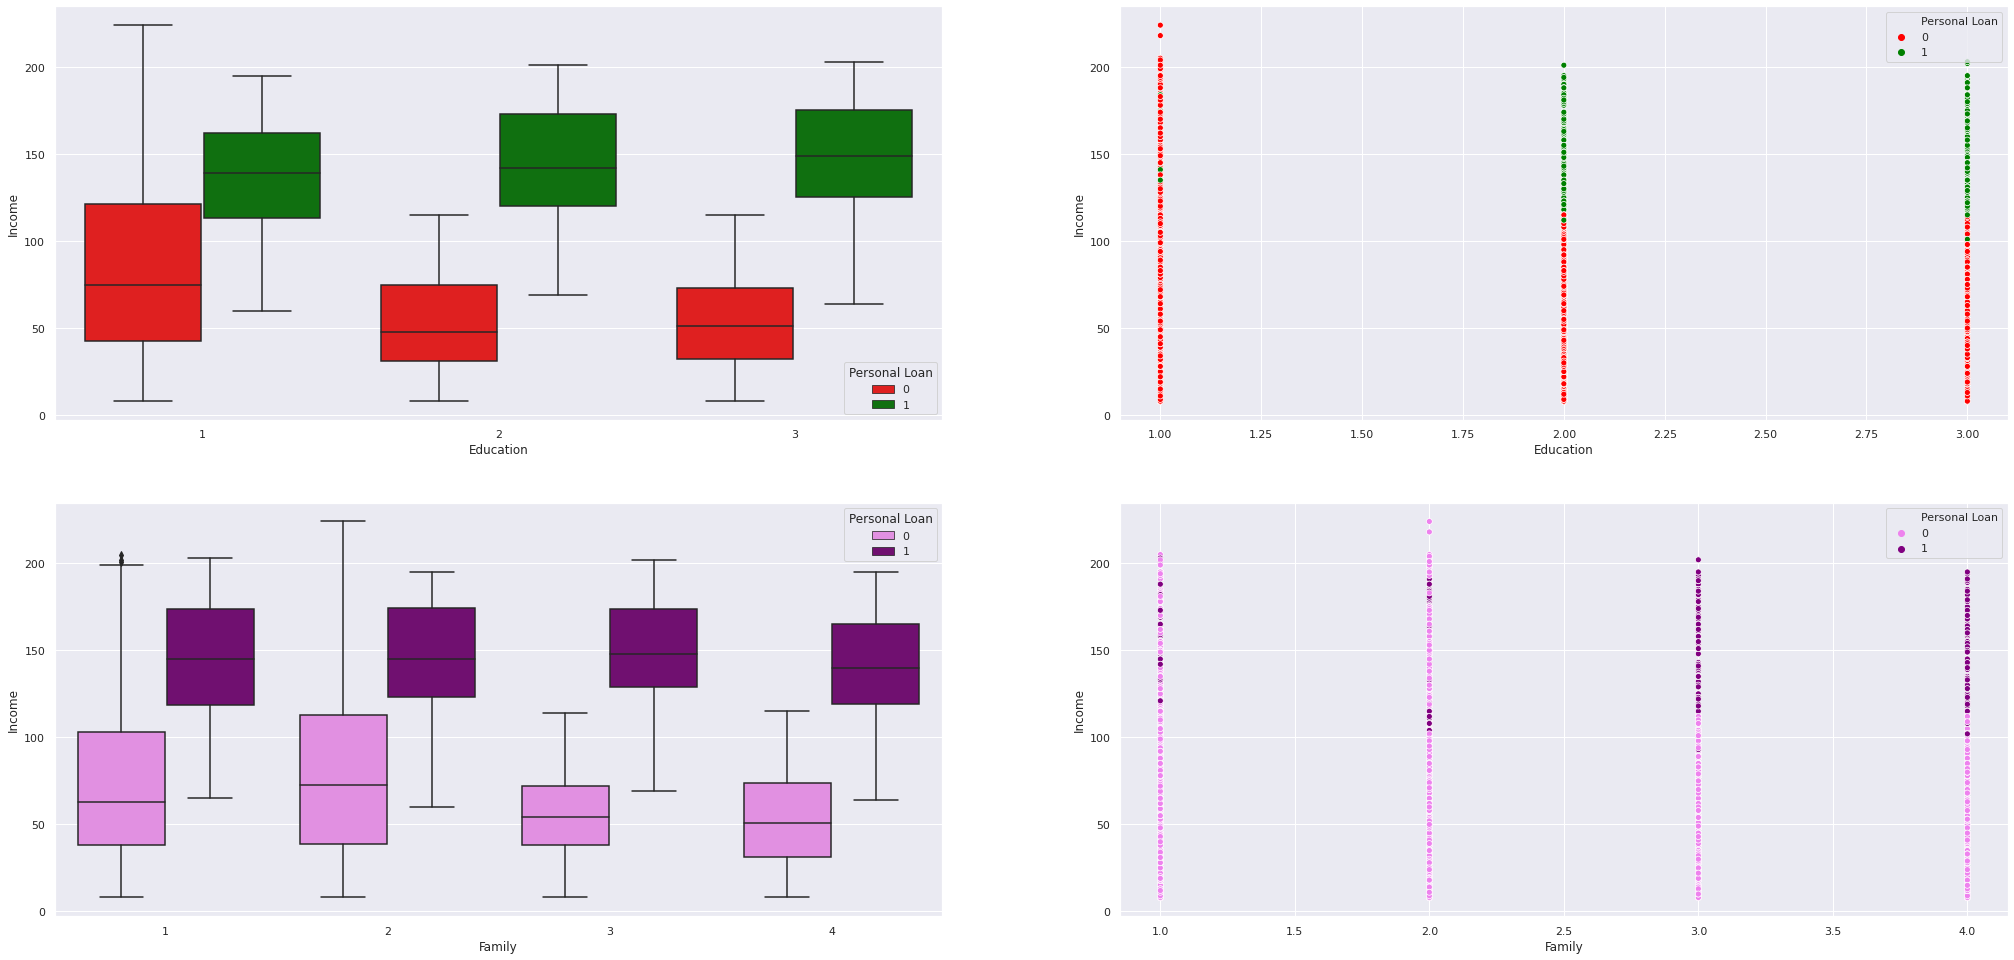

In [159]:
#Influence of different attributes on Personal Loan (Dependant Variable)

plt.figure(figsize=(35,35))

plt.subplot(4,2,1)
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df, palette= ['red','green']);

plt.subplot(4,2,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'],data=df, palette= ['red','green'])

plt.subplot(4,2,3)
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df, palette= ['violet','purple']);

plt.subplot(4,2,4)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['violet','purple'])

**Observations**

The above graphs shows that:-
* Customers with high Education Level with higher income(say above 100k) has higher probability in purchasing Loan.

*  As the members of family increases  the necessity of purchasing loan also increases with income.

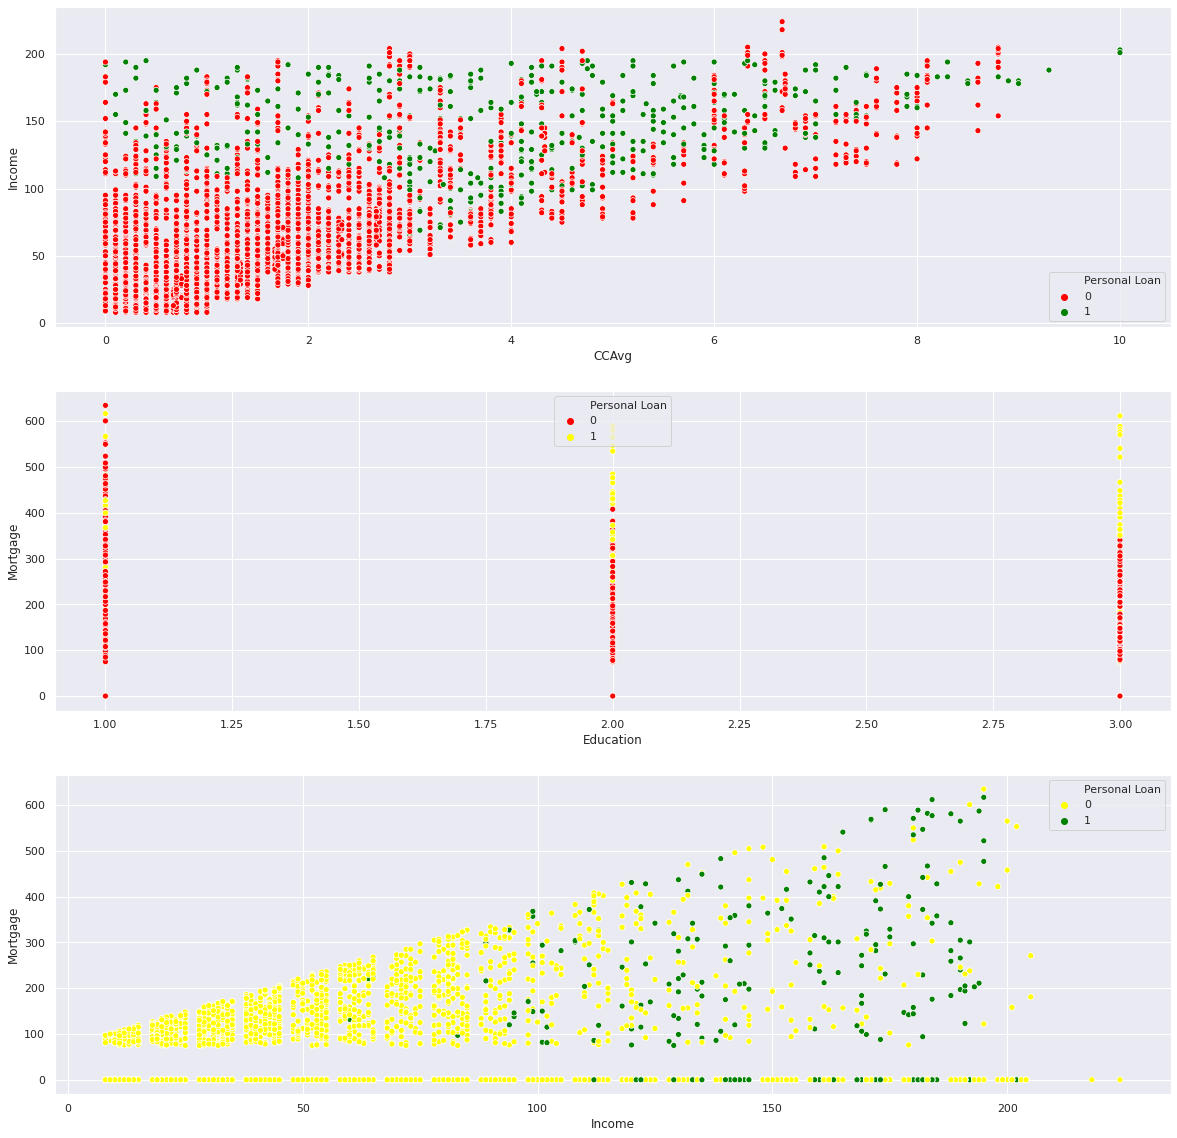

In [160]:
#Influence of different attributes on Personal Loan (Dependant Variable)

plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['yellow','green'])
                

 **Observations**
 
The above graphs show that:- 
* Customers who purchase personal loan have a higher credit card average and  approximately above (100k) income. 

* Customers with education level 2 & 3 seems highly probable to take personal loan when they have high mortgage value.


*  As the income increases , the mortgage value also increases gradually and with it the probability of purchasing Loan also increases.


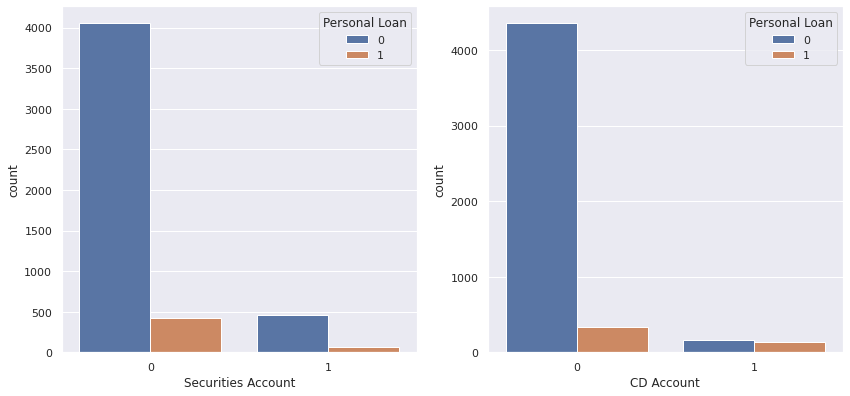

In [161]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan')

**Observations**


* Most of the customers that hold Securities Account have not purchased Loan and among the customers that have purchased loan most of them don't hold a Securities Account.
*   Most of the customers that have purchased loan  do not hold CD Account  and among the customers that holds a CD Account almost half of them have purchased loans.



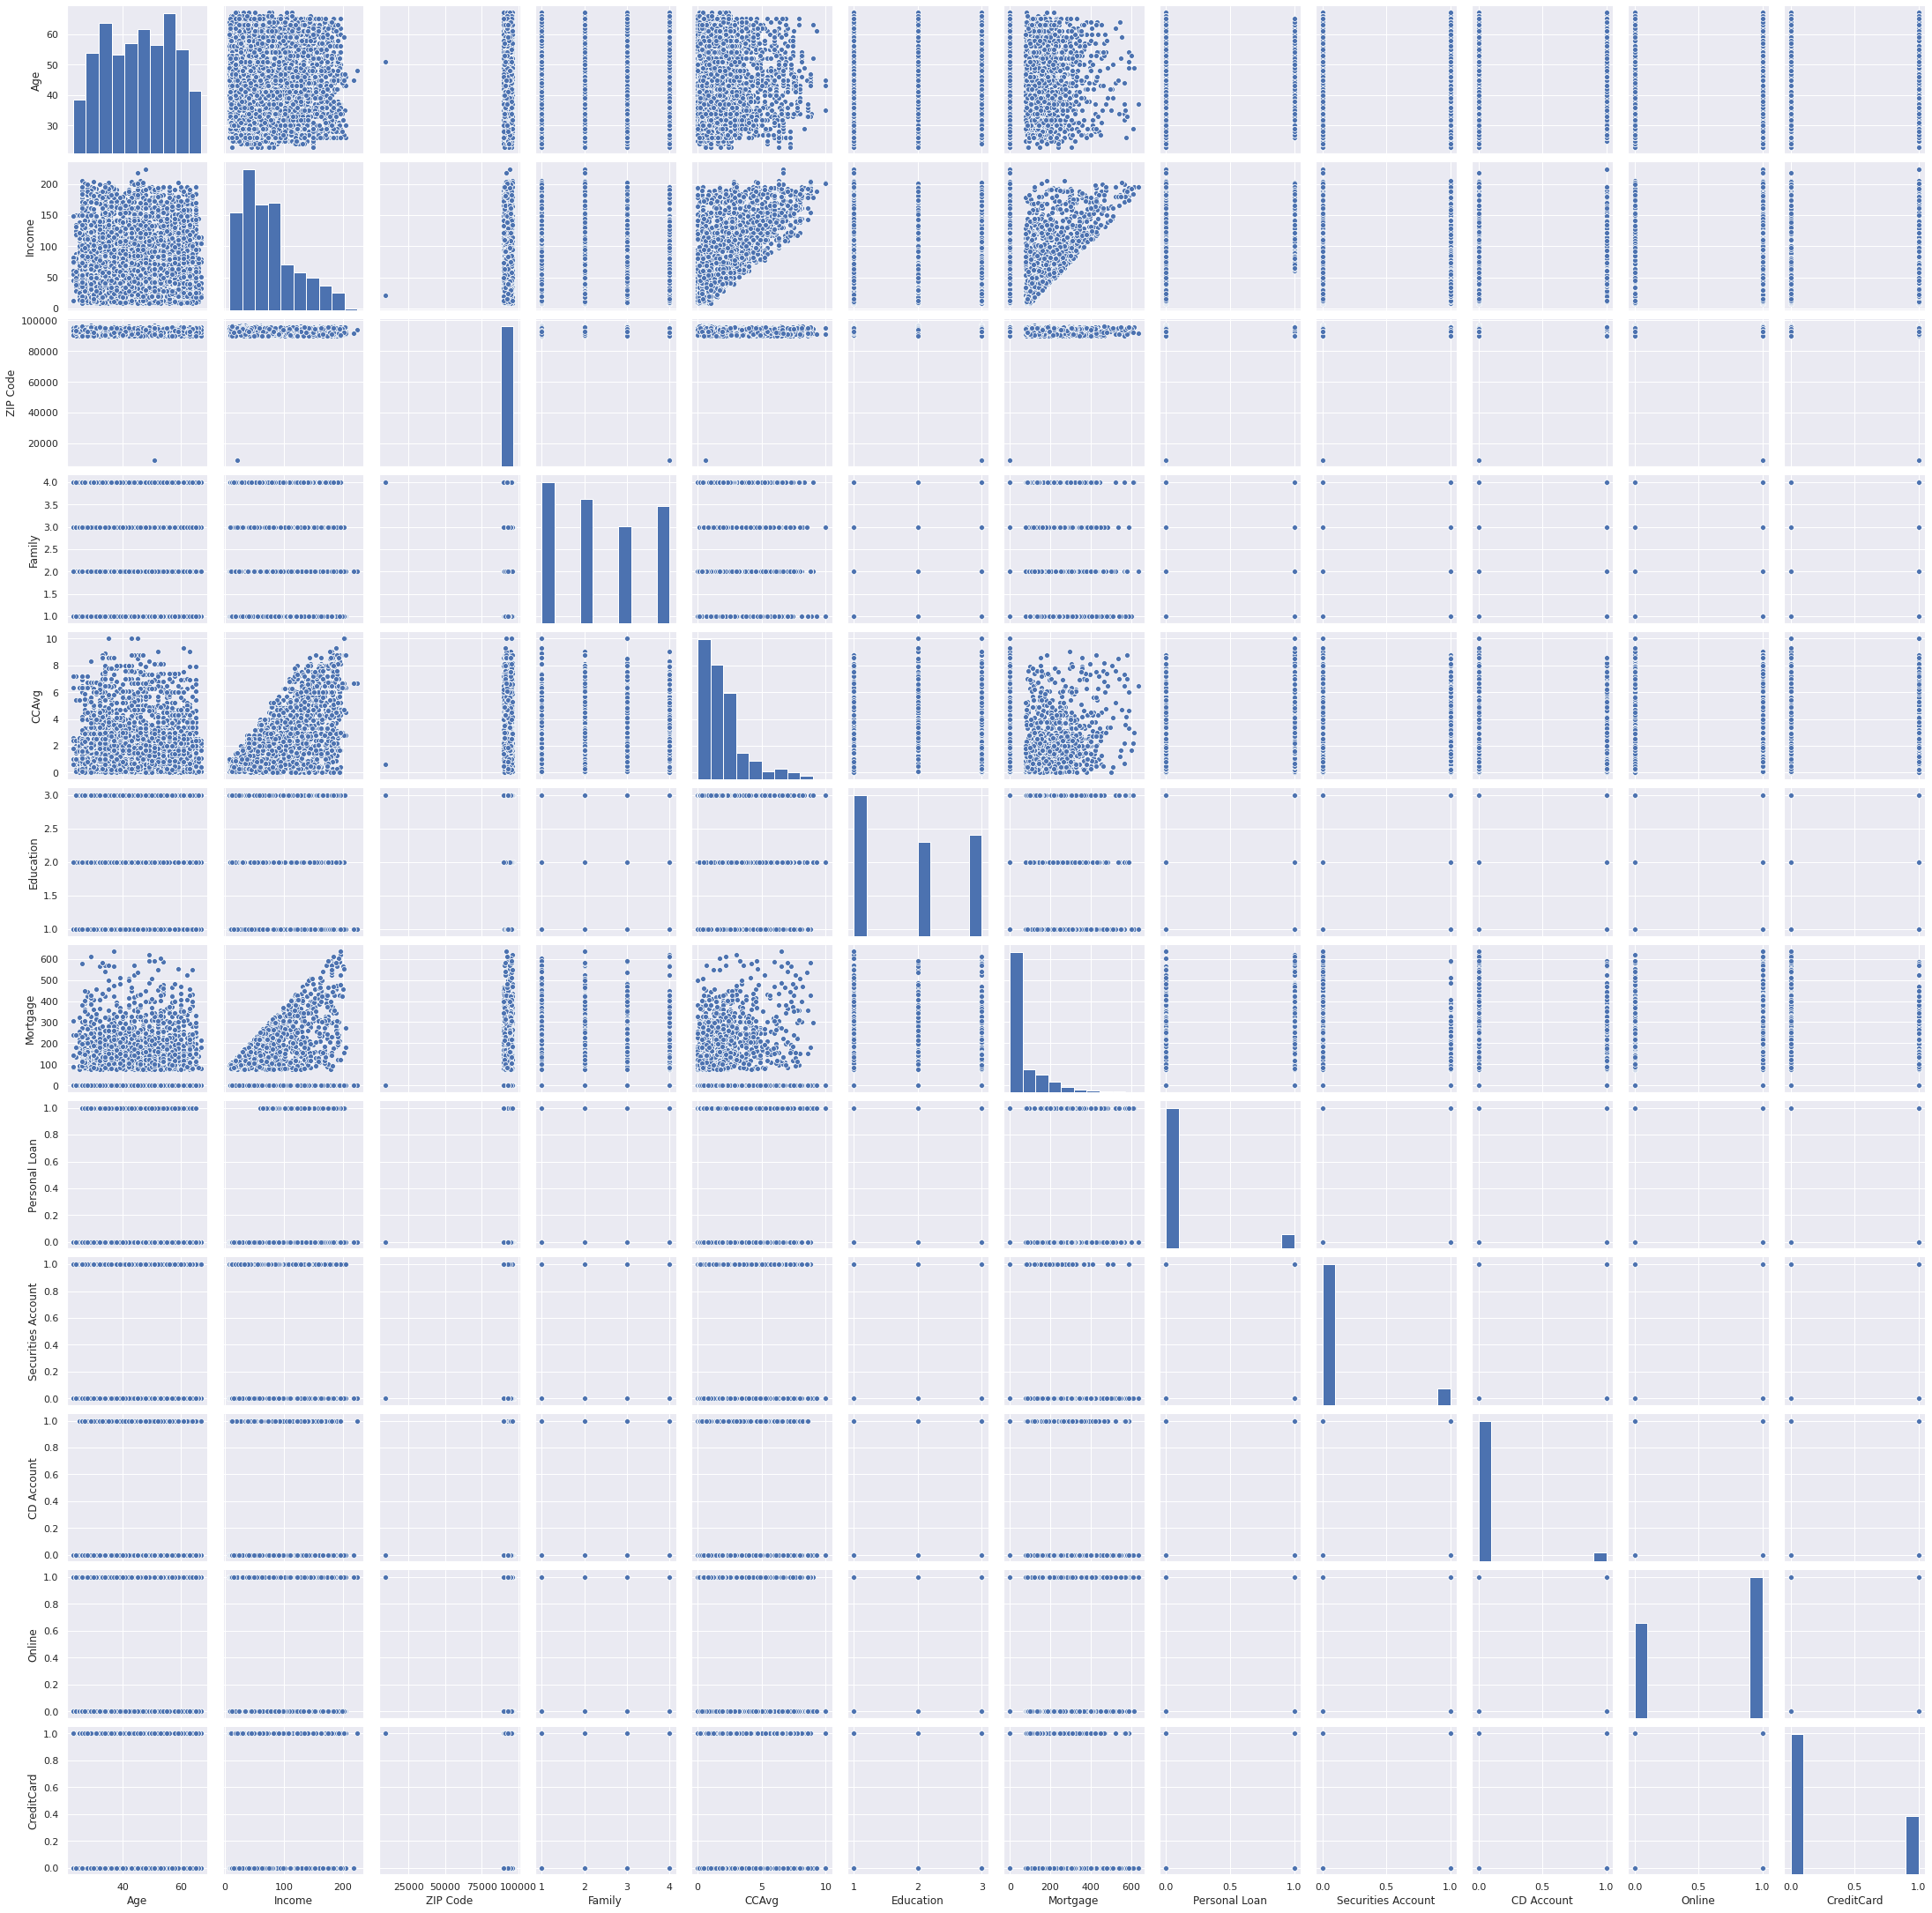

In [162]:
#Pairplots of dataset variables.These are Scatterplots between variables

sns.pairplot(df)

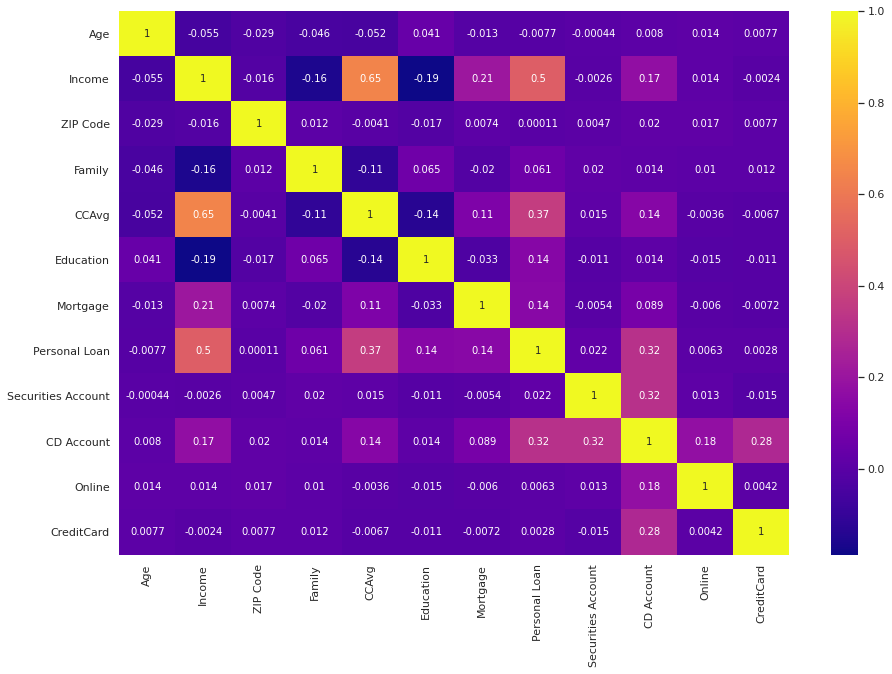

In [163]:
##Intercorrelation of Variables
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot = True)

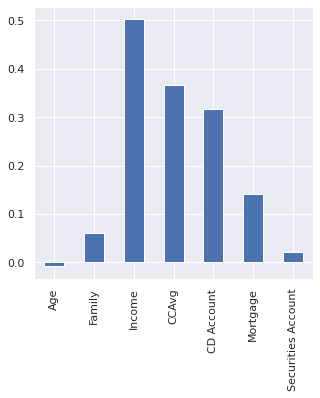

In [235]:
##Correlation of Variables with Personal Loan
df[['Personal Loan', 'Age','Family', 'Income', 'CCAvg','CD Account', 'Mortgage','Securities Account']].corr()['Personal Loan'][1:].plot.bar(figsize=(5,5))

**Observations**


*  The figure shows that there is a greater correlation for Personal Loan with Income and CCAvg when compared wuth the other variables.



In [165]:
data_X=df.loc[:,df.columns != 'Personal Loan']
data_Y=df[['Personal Loan']]
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1


In [166]:
data_Y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


##4. Transforming Feature Variables
---
The highly skewed values of Income ,CCAvg and Mortgage are normalized.





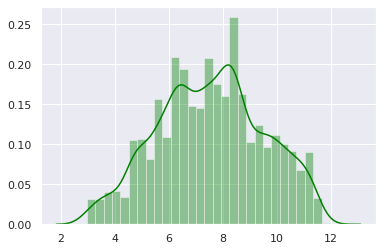

In [167]:
#Normalizing Income
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
temp=pt.transform(data_X['Income'].values.reshape(-1,1))
sns.distplot(temp,color='green')

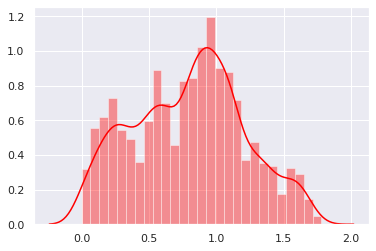

In [168]:
# Normalizing CCAvg
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp=pt.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(temp,color='red')

In [170]:
# Normalizing and label encoding Mortgage values
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)


In [126]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


##5. Splitting the data using Stratified sampling

---



In [173]:
from sklearn.model_selection import train_test_split
train_X, test_X,train_Y, test_Y = train_test_split(data_X,data_Y, test_size=0.3,stratify=data_Y, random_state=0)

In [176]:
train_X.reset_index(drop=True,inplace=True)
test_X.reset_index(drop=True,inplace=True)
train_Y.reset_index(drop=True,inplace=True)
test_Y.reset_index(drop=True,inplace=True)

In [177]:
test_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,34,180,93023,1,8.9,3,0,0,0,0,0
1,55,81,92123,2,3.7,1,1,0,0,0,0
2,48,128,94608,1,5.7,1,1,0,0,0,0
3,59,102,92677,4,3.0,2,0,0,1,0,1
4,44,82,95521,2,0.4,1,0,0,1,1,0


In [178]:
train_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,94301,3,0.4,1,0,0,1,1,0
1,64,35,90266,1,1.5,2,1,0,0,0,0
2,52,31,94923,4,1.8,1,0,0,1,1,0
3,32,20,93106,1,0.5,3,0,0,1,0,1
4,62,54,91320,1,0.8,1,1,0,0,1,0


##5.1 Normalising Data Using Standard Scaler

In [180]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(train_X.columns):
  scaler=StandardScaler()
  #fit to train data
  scaler.fit(train_X[[column]])
  #transform train data

  np_array=scaler.transform(train_X[[column]])
  train_X.loc[:,column]=pd.Series(np_array.flatten())

  #transform test data
 
  np_array=scaler.transform(test_X[[column]])
  test_X.loc[:,column]=pd.Series(np_array.flatten())

## 6.Logistics Regression

---



In [184]:
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score
#convert dataframes into numpy arrays
np_train_X=train_X.values
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values

In [185]:
cls1 = LogisticRegression(random_state=0)
cls1.fit(np_train_X,np_train_Y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
pred_1_test_X = cls1.predict(np_test_X)
pred_1_train_X = cls1.predict(np_train_X)

###6.1 Metrics for Evaluating Model Performance 

In [195]:
#Accuracy of Model
acc_1_train_X=accuracy_score(np_train_Y,pred_1_train_X)
acc_1_test_X=accuracy_score(np_test_Y,pred_1_test_X)
print("Base learner 1 accuracy on np_train_X:{:.4f}".format(acc_1_train_X))
print("Base learner 1 accuracy on np_test_X:{:.4f}".format(acc_1_test_X))

Base learner 1 accuracy on np_train_X:0.9520
Base learner 1 accuracy on np_test_X:0.9513


In [219]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt=".2f",xticklabels=[0,1],yticklabels=[0,1])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Output")
    plt.ylabel("Observed Output")
    plt.show()

In [189]:
np_test_Y.shape

(1500, 1)

Confusion Matrix


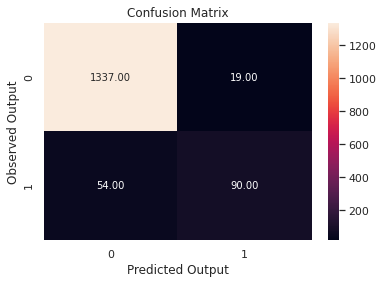

None


In [220]:
#Confusion Matrix
print("Confusion Matrix")
print(draw_cm(np_test_Y,pred_1_test_X.reshape(-1,1)))

In [193]:
#Other Metrics used
print("Recall:",recall_score(np_test_Y,pred_1_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_1_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_1_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_1_test_X))
print()

Recall: 0.625

Precision: 0.8256880733944955

F1 Score: 0.7114624505928855

Roc Auc Score: 0.8054941002949852



In [225]:
print(classification_report(np_test_Y, pred_1_test_X))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## 7.Decision Tree Classifier

---




In [198]:
cls2 = DecisionTreeClassifier(random_state=0,max_depth=8)
cls2.fit(np_train_X,np_train_Y.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [202]:
pred_2_test_X = cls2.predict(np_test_X)
pred_2_train_X = cls2.predict(np_train_X)

###7.1 Metrics For Evaluating Model Performance

In [203]:
#Accuracy of Model
acc_2_train_X=accuracy_score(np_train_Y,pred_2_train_X)
acc_2_test_X=accuracy_score(np_test_Y,pred_2_test_X)
print("Base learner 2 accuracy on np_train_X:{:.4f}".format(acc_2_train_X))
print("Base learner 2 accuracy on np_test_X:{:.4f}".format(acc_2_test_X))

Base learner 2 accuracy on np_train_X:0.9960
Base learner 2 accuracy on np_test_X:0.9800


In [204]:
np_test_Y.shape

(1500, 1)

Confusion Matrix


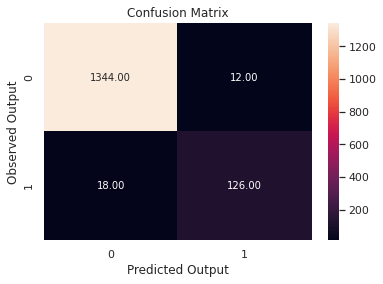

None


In [221]:
#draw_cm Method for confusion matrix is defined in the above section.
#Confusion Matrix
print("Confusion Matrix")
print(draw_cm(np_test_Y,pred_2_test_X.reshape(-1,1)))

In [217]:
#Other Metrics used
print("Recall:",recall_score(np_test_Y,pred_2_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_2_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_2_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_2_test_X))
print()

Recall: 0.875

Precision: 0.9130434782608695

F1 Score: 0.8936170212765957

Roc Auc Score: 0.933075221238938



In [224]:
print(classification_report(np_test_Y, pred_2_test_X))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## 8. Random Forest Classifier

---



In [207]:
cls3 = RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
cls3.fit(np_train_X,np_train_Y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [208]:
pred_3_test_X = cls3.predict(np_test_X)
pred_3_train_X = cls3.predict(np_train_X)

###8.1 Metrics For Evaluating Model Performance.

In [209]:
#Accuracy of Model
acc_3_train_X=accuracy_score(np_train_Y,pred_3_train_X)
acc_3_test_X=accuracy_score(np_test_Y,pred_3_test_X)
print("Base learner 3 accuracy on np_train_X:{:.4f}".format(acc_3_train_X))
print("Base learner 3 accuracy on np_test_X:{:.4f}".format(acc_3_test_X))

Base learner 3 accuracy on np_train_X:0.9949
Base learner 3 accuracy on np_test_X:0.9873


Confusion Matrix


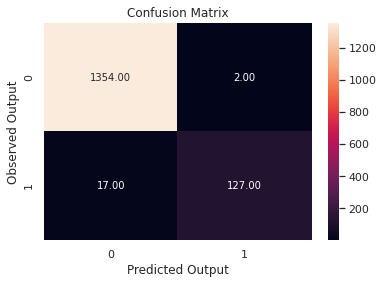

None


In [222]:
#draw_cm Method for confusion matrix is defined in an earlier section.
#Confusion Matrix
print("Confusion Matrix")
print(draw_cm(np_test_Y,pred_3_test_X.reshape(-1,1)))

In [218]:
#Other Metrics used
print("Recall:",recall_score(np_test_Y,pred_3_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_3_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_3_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_3_test_X))
print()

Recall: 0.8819444444444444

Precision: 0.9844961240310077

F1 Score: 0.9304029304029303

Roc Auc Score: 0.9402347590953786



In [223]:
print(classification_report(np_test_Y, pred_3_test_X))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



##**Model Comparison**

---



LR: 0.910800 (0.012172)
DT: 0.981800 (0.004045)
RF: 0.986000 (0.004899)


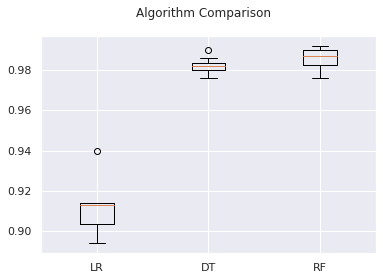

In [229]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, data_X, data_Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##9. Business Understanding Of the Model

---





**By visualising the provided datset we were able to observe that:**
 *  Family and Education are ordinal variables since they are evenly distributed.
 * Also it seems that not many of the population holds Securities account nor CD  Account.
 * And a greater part of the population has access to online banking.
 * Also atmost 1500 holds a credit card.(see fig)
 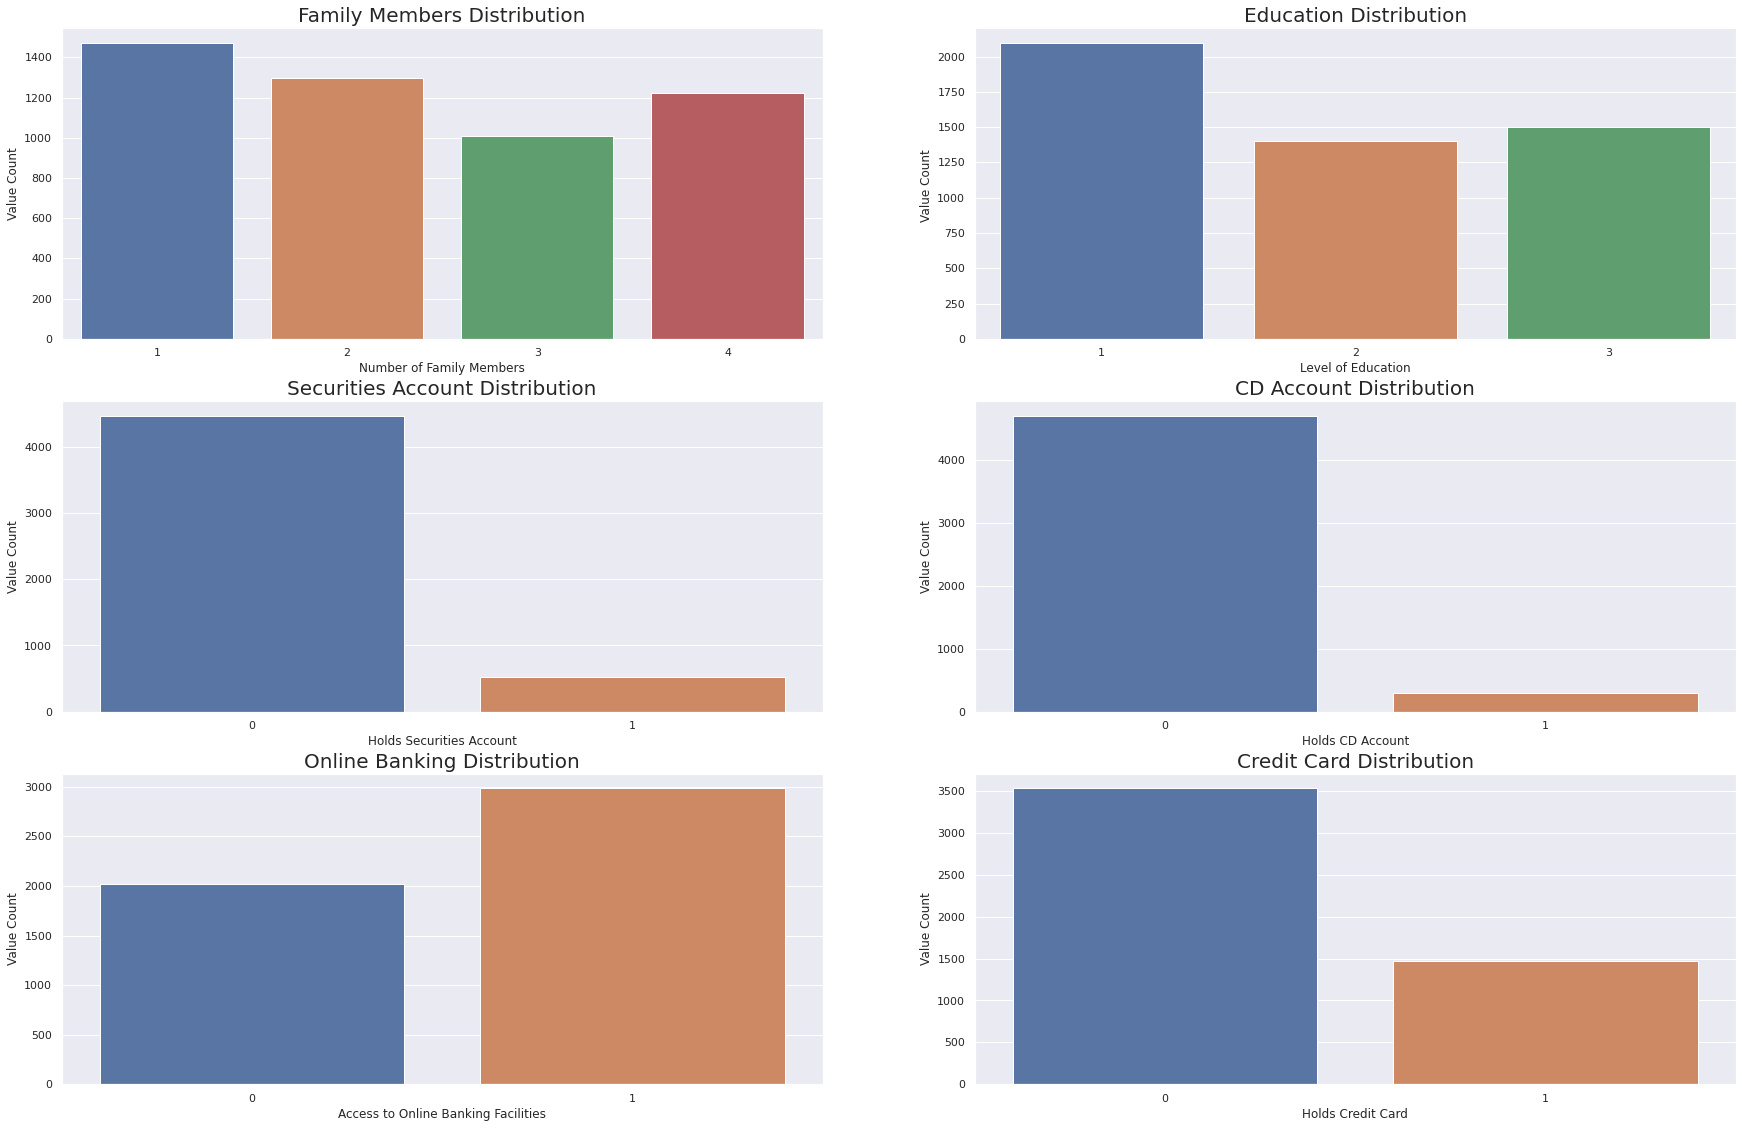
**Also by plotting the distribution of numerical variables we were able to infer that:**

 * Age feature is a normally distributed variable with majority of customers falling between 35 years and 55 years of age. We can also infer from the boxplot above, that mean is almost equal to median.

*  Income is positively skewed. Majority of the customers have income between 40K and 55K.

* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority of customers spends less than 2.5K.

* Most of the individuals have a mortgage of less than 50K. However the max value of mortgage is 635K(see fig).
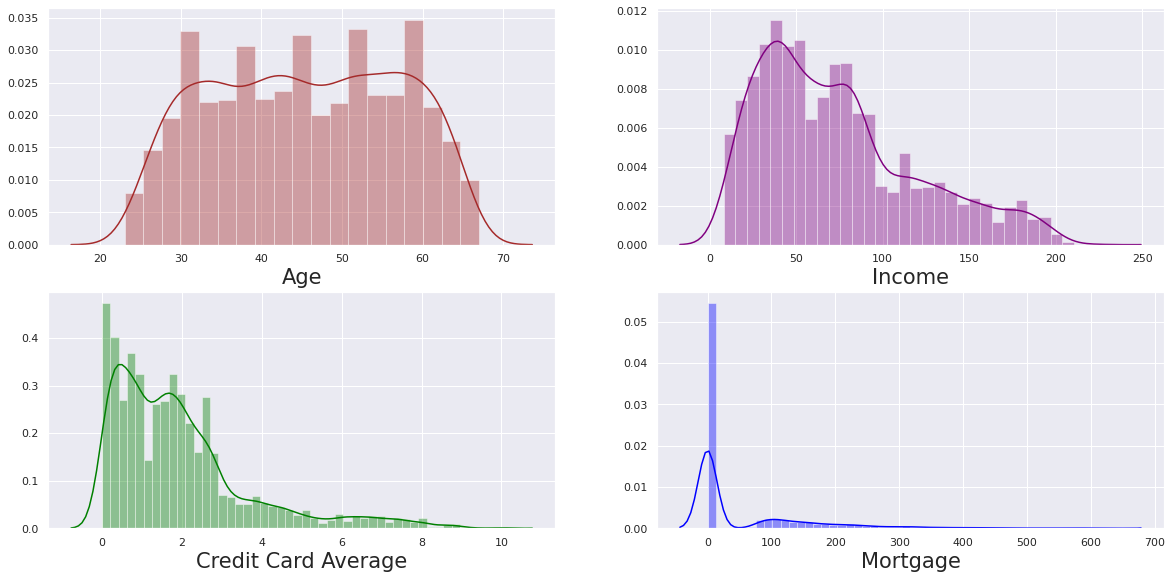



**After conducting Bivariate Analysis on dataset variables we were able to conclude that:**
* Customers with high Education Level with higher income(say above 100k) has higher probability in purchasing Loan.

*  As the members of family increases  the necessity of purchasing loan also increases with income(shown in fig).
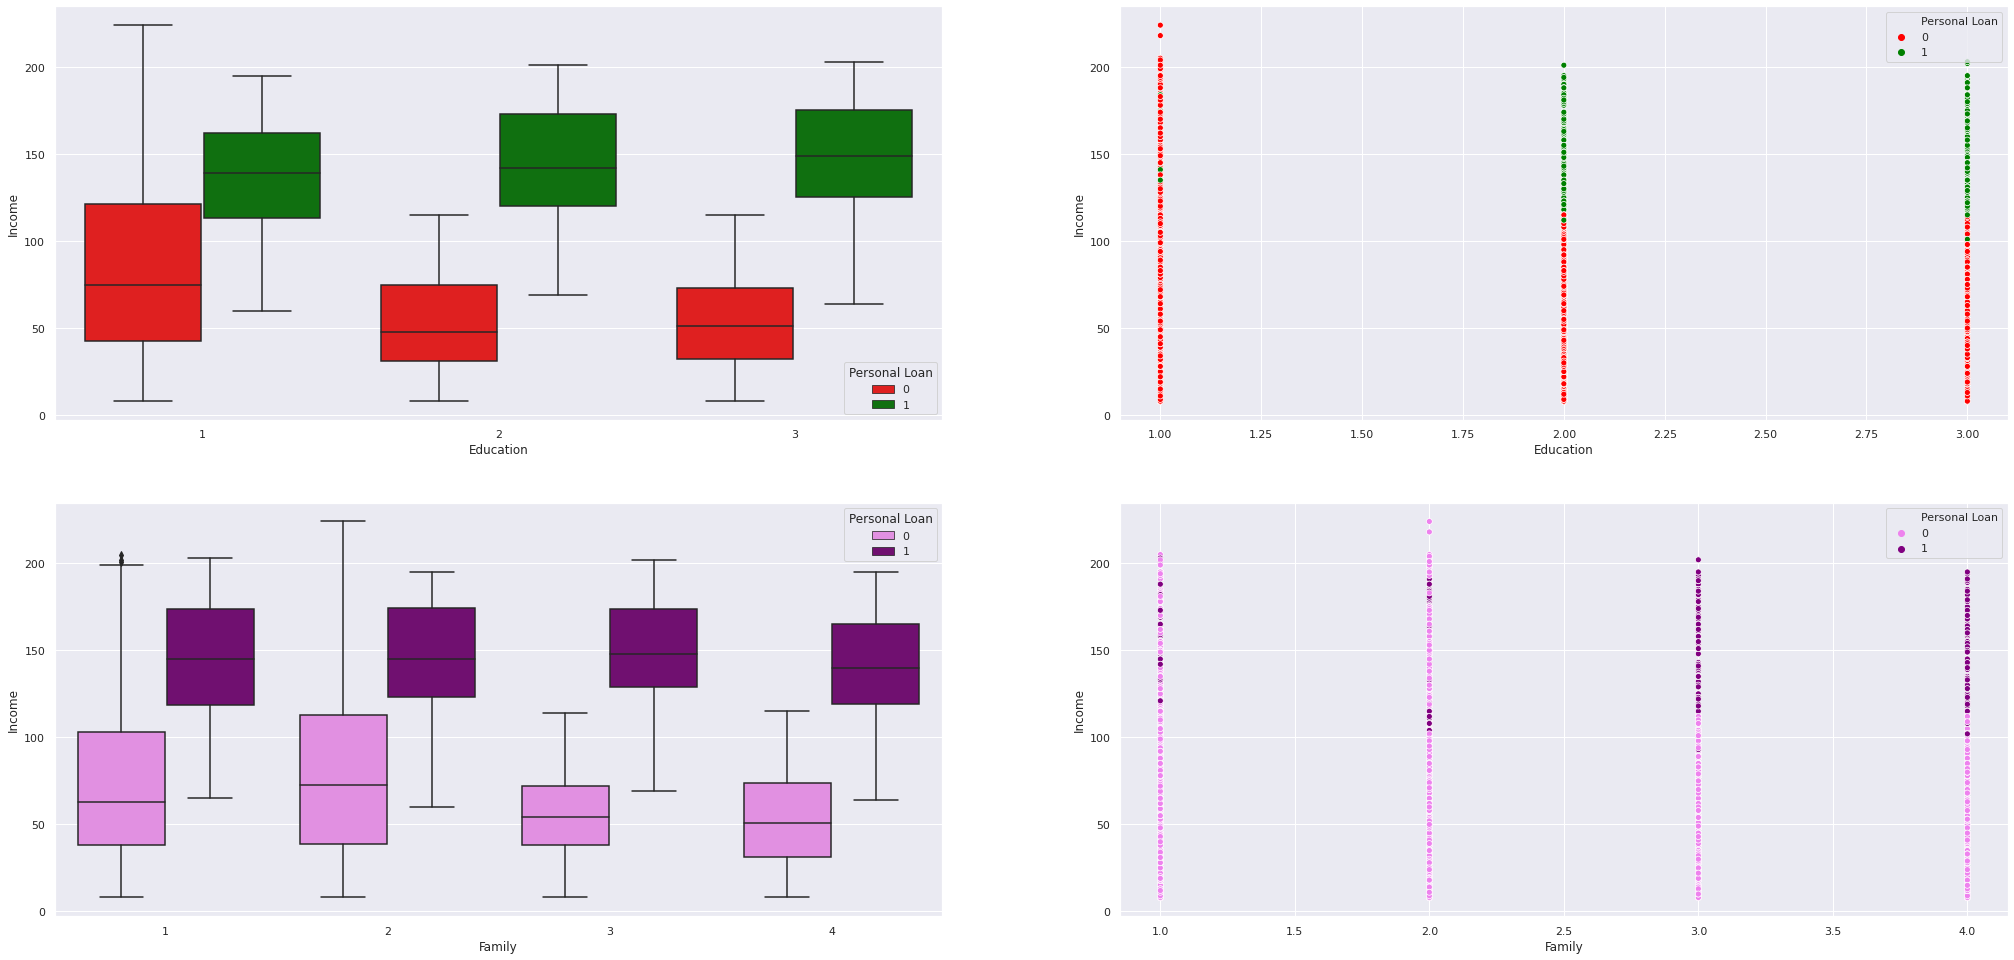
* Customers who purchase personal loan have a higher credit card average and  approximately above (100k) income. 

* Customers with education level 2 & 3 seems highly probable to take personal loan when they have high mortgage value.


*  Also as the income increases , the mortgage value also increases gradually and with it the probability of purchasing Loan also increases(see fig).
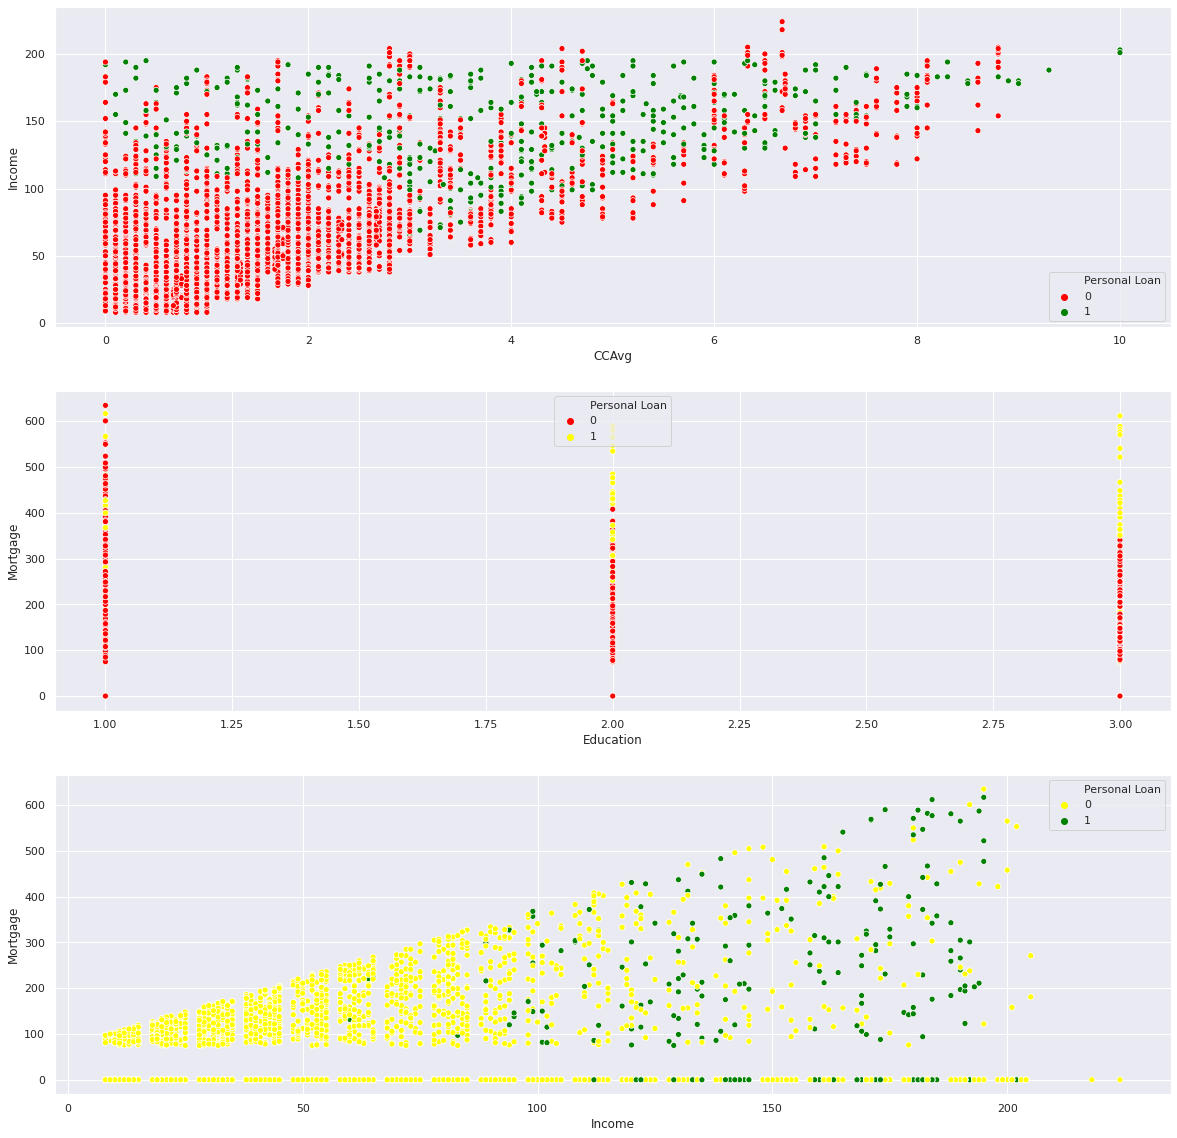

* Most of the customers that hold Securities Account have not purchased Loan and among the customers that have purchased loan most of them don't hold a Securities Account.
*   Most of the customers that have purchased loan  do not hold CD Account  and among the customers that holds a CD Account almost half of them have purchased loans(as shown in fig).
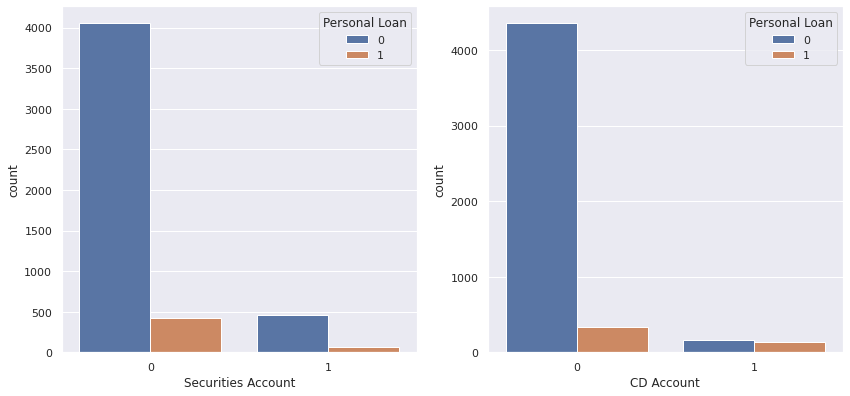


* By computing the correlation of dependant variable Personal Loan with other independant variables we were able to conclude that Income is most correlated with Personal Loan followed by CCAvg,CD Account,Mortgage,Family,Securities Account,Age.
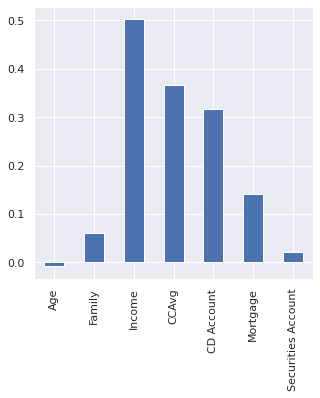



**Model Comparison**

---



* By comparing the Models we were able to infer that Random Forest Classifier predicts the output with the highest Accuracy(98.6%),followed by Decision Tree Classifier (98.1%) and Logistic Regresssion Model(91.08%)
*  The confusion matrix of each model gave a detailed comparison of actual output and predicted output.

A better model is  where the number of customers who actually purchases a loan but is instead predicted to not purchase is reduced(shown in fig). 
i.e. circled value should be reduced.

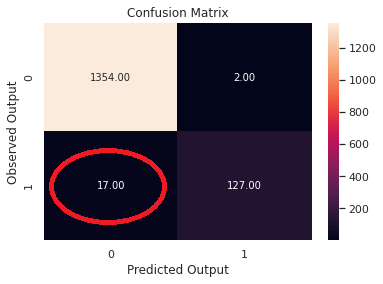

Whereas, those cases in which the customers that does not actually require a loan but is predicted to need one is ignored(since they don't need a loan anyways). 

 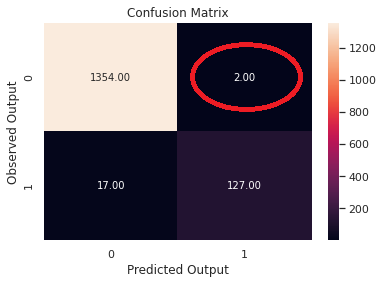
 * Among the models employed, the model that is the most close in realising this goal and increasing the profit of the bank is the Random Forest Classifier.Thus in conclusion the best Model for this scenario is the Random Forest Classifier.